## Analisys Time Series AirPassengers

#### Data consist of the date and monthly passenger count values

In [19]:
import numpy as np
import pandas as pd 
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('AirPassengers.csv')

In [9]:
data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

## Lets display the total monthly passenger count

In [13]:
#Use de lambda funtion to filter month
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


## Assigning the passenger data time series

In [14]:
ts = data['#Passengers']

## Plotting the time series

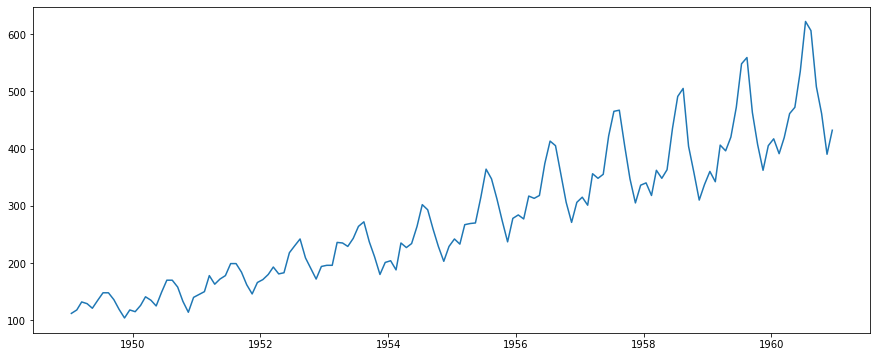

In [16]:
plt.plot(ts)

# Rolling Statisctics
A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.
One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [17]:
# Transforming series using log decomposition
ts_log = np.log(ts)

In [32]:
# Dickey-Fuller test, rolling mean, rolling standar deviation
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
# Plot rolling statistics
    orig = plt.plot(timeseries,color="blue",label='Original')
    mean = plt.plot(rolmean,color="red",label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    print('Result Of Dickey Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used',
                                           'Number Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
        print(dfoutput)
    

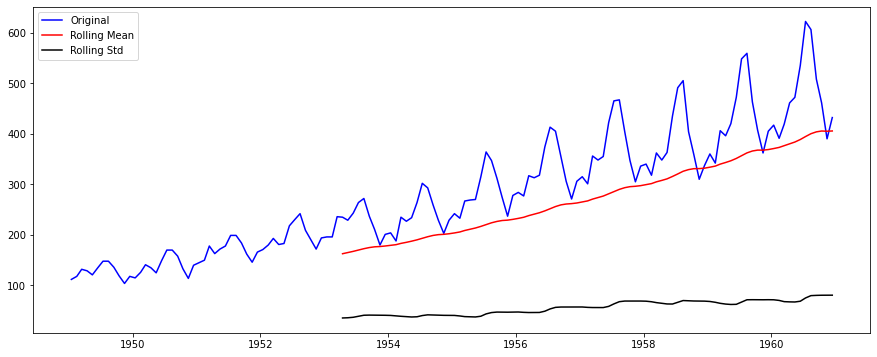

Result Of Dickey Fuller Test:
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
Number Observations Used    130.000000
Critical Value (1%)          -3.481682
dtype: float64
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
Number Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
dtype: float64
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
Number Observations Used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [33]:
test_stationarity(data['#Passengers'])

## Results
We infer the test statistics is more than critical value and the moving average  is not constant over the time.
The null hypothesis of the Dickey Fuller Test cannot rejected.
This shows that the time series is not stationary.

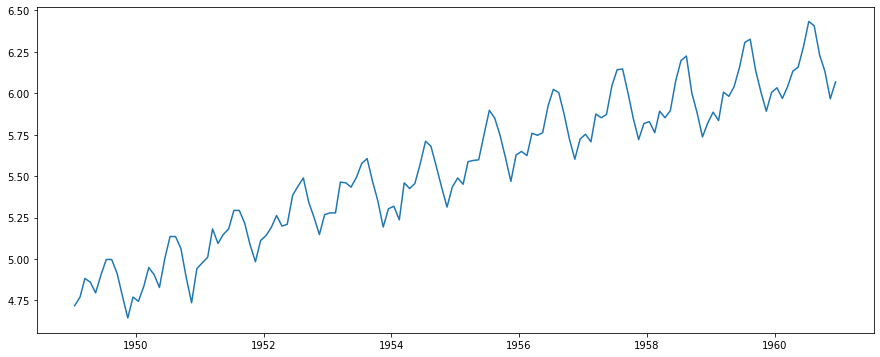

In [34]:
plt.plot(ts_log)

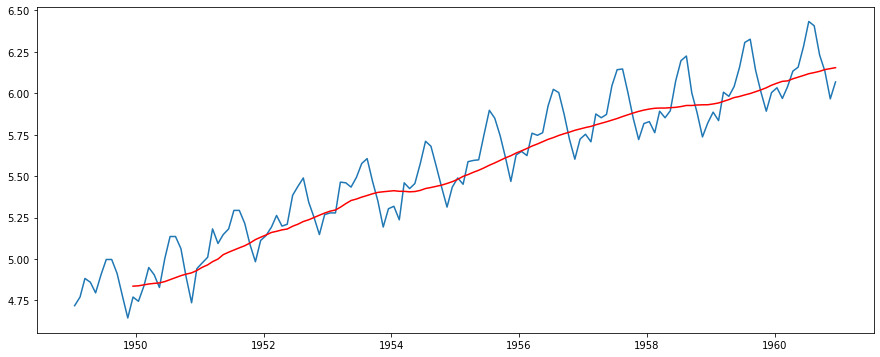

In [35]:
# Let's decomposing the data andthe moving average variable
movingAverage = ts_log.rolling(window=12).mean()
movinsSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [36]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

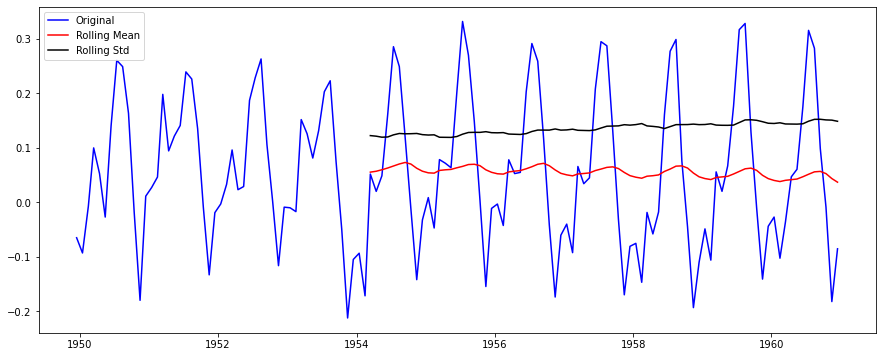

Result Of Dickey Fuller Test:
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
Number Observations Used    119.000000
Critical Value (1%)          -3.486535
dtype: float64
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
Number Observations Used    119.000000
Critical Value (1%)          -3.486535
Critical Value (5%)          -2.886151
dtype: float64
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
Number Observations Used    119.000000
Critical Value (1%)          -3.486535
Critical Value (5%)          -2.886151
Critical Value (10%)         -2.579896
dtype: float64


In [37]:
test_stationarity(ts_log_mv_diff)

## The results
The Dickey fuller test, show that the test statistic is less than 1% of critical value.
That tells us that we are 99% confident that this series is stationary.
We can rejectec the null hypothesis.